<a href="https://www.kaggle.com/code/giovannasouzateodoro/an-lise-explorat-ria-de-dados-espaciais?scriptVersionId=111988739" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

📆 11-24-2022

# 🇺🇸 **Exploratory spatial data analysis (ESDA)**

# 🇧🇷 **Análise Exploratória de Dados Espaciais (AEDE)**

In [1]:
import pandas as pd 
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
%matplotlib inline

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
brasilgpd = gpd.read_file("../input/majson/data/Brasil.json")

In [3]:
brasilgpd

,UF,ESTADO,REGIAO,geometry
0,AC,Acre,NO,"POLYGON ((-68.61895 -11.12971, -68.68534 -11.1..."
1,AL,Alagoas,NE,"POLYGON ((-36.43149 -10.44823, -36.47339 -10.4..."
2,AP,Amapá,NO,"MULTIPOLYGON (((-51.90932 -1.16579, -51.96526 ..."
3,AM,Amazonas,NO,"POLYGON ((-63.47887 2.19845, -63.43955 2.09251..."
4,BA,Bahia,NE,"MULTIPOLYGON (((-45.95923 -14.89726, -45.93537..."
5,CE,Ceará,NE,"POLYGON ((-40.47409 -7.41516, -40.51021 -7.344..."
6,DF,Distrito Federal,CO,"POLYGON ((-48.20931 -16.05273, -48.21919 -15.7..."
7,ES,Espírito Santo,SE,"POLYGON ((-41.80259 -20.80264, -41.77730 -20.7..."
8,GO,Goiás,CO,"POLYGON ((-53.12897 -18.04132, -53.05560 -17.9..."
9,MA,Maranhão,NE,"MULTIPOLYGON (((-45.80974 -10.32479, -45.88642..."


In [4]:
df = pd.read_csv('../input/chuu-do-loona/chuu-dataset.csv')
df.columns = ['faculdade','UF','link'] # rename {'estado':'UF'}

In [5]:
df

,faculdade,UF,link
0,UERJ,RJ,https://twitter.com/OrbitsBrasil/status/156548...
1,UNB,DF,https://twitter.com/OrbitsBrasil/status/156548...
2,UFBA,BA,https://twitter.com/OrbitsBrasil/status/156548...
3,UFF,RJ,https://twitter.com/OrbitsBrasil/status/156548...
4,IFCE,CE,https://twitter.com/OrbitsBrasil/status/156548...
...,...,...,...
152,UFJF,MG,https://twitter.com/larababu/status/1575584725...
153,UFRGS,RS,https://twitter.com/changeunbi/status/15608133...
154,UFMT,MT,https://twitter.com/luketelindo/status/1560041...
155,UFF,RJ,https://twitter.com/venusmyg/status/1578428063...


In [6]:
df = df.groupby('UF').count()
df = df.reset_index() # index: 0, 1, 2, 3... 
df = df.drop('link',axis=1) # or 'faculdade'
df.columns = ['UF','qtd'] # rename {'faculdade':'qtd'}

In [7]:
df

,UF,qtd
0,AL,6
1,AM,7
2,AP,2
3,BA,8
4,CE,12
5,DF,4
6,ES,3
7,GO,6
8,MA,3
9,MG,14


In [8]:
df_final = pd.merge(df,brasilgpd,how='outer')

In [9]:
df_final

,UF,qtd,ESTADO,REGIAO,geometry
0,AL,6.0,Alagoas,NE,"POLYGON ((-36.43149 -10.44823, -36.47339 -10.4..."
1,AM,7.0,Amazonas,NO,"POLYGON ((-63.47887 2.19845, -63.43955 2.09251..."
2,AP,2.0,Amapá,NO,"MULTIPOLYGON (((-51.90932 -1.16579, -51.96526 ..."
3,BA,8.0,Bahia,NE,"MULTIPOLYGON (((-45.95923 -14.89726, -45.93537..."
4,CE,12.0,Ceará,NE,"POLYGON ((-40.47409 -7.41516, -40.51021 -7.344..."
5,DF,4.0,Distrito Federal,CO,"POLYGON ((-48.20931 -16.05273, -48.21919 -15.7..."
6,ES,3.0,Espírito Santo,SE,"POLYGON ((-41.80259 -20.80264, -41.77730 -20.7..."
7,GO,6.0,Goiás,CO,"POLYGON ((-53.12897 -18.04132, -53.05560 -17.9..."
8,MA,3.0,Maranhão,NE,"MULTIPOLYGON (((-45.80974 -10.32479, -45.88642..."
9,MG,14.0,Minas Gerais,SE,"POLYGON ((-50.92955 -19.45169, -50.80178 -19.4..."


In [10]:
df_final['qtd'] = df_final['qtd'].fillna(0) # NaN = 0

In [11]:
df_final

,UF,qtd,ESTADO,REGIAO,geometry
0,AL,6.0,Alagoas,NE,"POLYGON ((-36.43149 -10.44823, -36.47339 -10.4..."
1,AM,7.0,Amazonas,NO,"POLYGON ((-63.47887 2.19845, -63.43955 2.09251..."
2,AP,2.0,Amapá,NO,"MULTIPOLYGON (((-51.90932 -1.16579, -51.96526 ..."
3,BA,8.0,Bahia,NE,"MULTIPOLYGON (((-45.95923 -14.89726, -45.93537..."
4,CE,12.0,Ceará,NE,"POLYGON ((-40.47409 -7.41516, -40.51021 -7.344..."
5,DF,4.0,Distrito Federal,CO,"POLYGON ((-48.20931 -16.05273, -48.21919 -15.7..."
6,ES,3.0,Espírito Santo,SE,"POLYGON ((-41.80259 -20.80264, -41.77730 -20.7..."
7,GO,6.0,Goiás,CO,"POLYGON ((-53.12897 -18.04132, -53.05560 -17.9..."
8,MA,3.0,Maranhão,NE,"MULTIPOLYGON (((-45.80974 -10.32479, -45.88642..."
9,MG,14.0,Minas Gerais,SE,"POLYGON ((-50.92955 -19.45169, -50.80178 -19.4..."


In [12]:
print(type(df_final),' ', type(brasilgpd)) # check difference

<class 'pandas.core.frame.DataFrame'>   <class 'geopandas.geodataframe.GeoDataFrame'>


In [13]:
df_final = GeoDataFrame(df_final) # transform

In [14]:
print(type(df_final),' ', type(brasilgpd)) # check difference

<class 'geopandas.geodataframe.GeoDataFrame'>   <class 'geopandas.geodataframe.GeoDataFrame'>


<AxesSubplot:title={'center':'CHUUS PELO BRASIL | CHUUS AROUND BRAZIL'}>

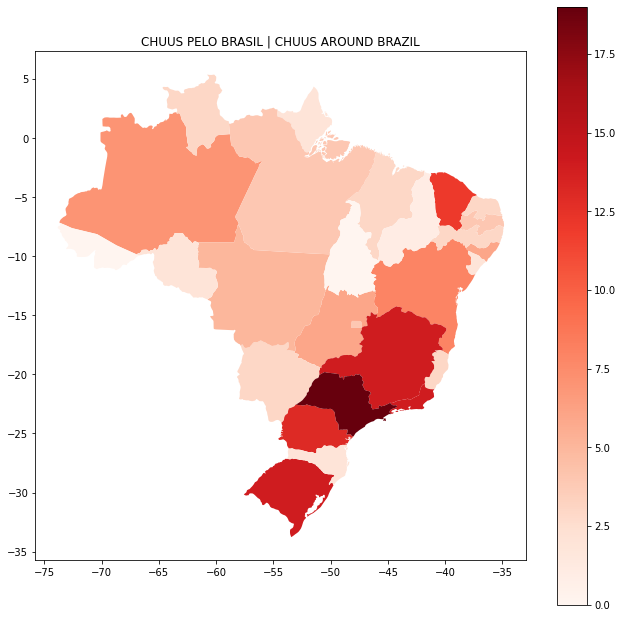

In [15]:
fig , ax = plt.subplots(figsize=(11,11))
plt.title('CHUUS PELO BRASIL | CHUUS AROUND BRAZIL')
df_final.plot(column = 'qtd',ax = ax, legend=True, cmap='Reds')